In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [313]:


def expectation_step(X, pi, mu, cov):
    N, D = X.shape
    K = len(pi)
    r = np.zeros((N, K))

    for k in range(K):
        r[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=cov[k])

    # Normalize the ronsibilities
    r_sum = np.sum(r, axis=1)
    for k in range(K):
        r[:, k] /= r_sum

    return r

def maximization_step(X, r):
    N, D = X.shape
    K = r.shape[1]

    # Update pi
    pi = np.sum(r, axis=0) / N

    # Update mu
    mu = np.zeros((K, D))
    for k in range(K):
        mu[k] = np.sum(r[:, k].reshape(-1, 1) * X, axis=0) / np.sum(r[:, k])

    # Update covariance
    cov = np.zeros((K, D, D))
    for k in range(K):
        diff = X - mu[k]
        cov[k] = np.dot(r[:, k] * diff.T, diff) / np.sum(r[:, k])

    return pi, mu, cov

def EM(X, K, max_iter=100):
    N, D = X.shape

    # Initialize the parameters
    pi = np.ones(K) / K
    mu = np.random.randn(K, D)
    cov = np.array([np.eye(D) for _ in range(K)])

    # Run EM algorithm
    for i in range(max_iter):
        r = expectation_step(X, pi, mu, cov)
        pi, mu, cov = maximization_step(X, r)

    return pi, mu, cov

In [314]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [315]:
data=california_housing.frame

In [316]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
data_newdim=pca.fit_transform(data)
scalar=StandardScaler()
data_std=scalar.fit_transform(data_newdim)


In [317]:
df=pd.DataFrame(data_std)

In [318]:
def predict_clusters(data, pi, mu, sigma):
    posterior_probs = np.zeros((data.shape[0], pi.shape[0]))
    for k in range(pi.shape[0]):
        posterior_probs[:, k] = pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=sigma[k])

    # assign each data point to the cluster with the highest posterior probability
    cluster_label = np.argmax(posterior_probs, axis=1)

    return cluster_label


In [319]:
from sklearn.metrics import silhouette_score
score=[]

In [320]:
k_values=[2,3,4]


 when k is : 2
mu values are: [[-0.25997239  0.06201708]
 [ 1.3509222  -0.32226596]]
var is : [[[ 0.22286048 -0.02163143]
  [-0.02163143  0.99320158]]

 [[ 2.86213956  0.63154218]
  [ 0.63154218  0.91148599]]]
pi is  [0.83861614 0.16138386]
silhietter score is: 0.45548719509551755


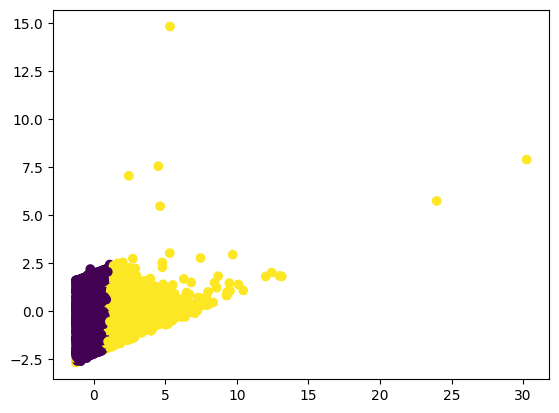

In [321]:
k=2

print('\n when k is :',k)
pi,mu,var=EM(df, k, max_iter=500)
print('mu values are:',mu)
print('var is :',var)
print('pi is ',pi)

prediction_k2=predict_clusters(df,pi,mu,var)
sc=silhouette_score(df,prediction_k2)
print('silhietter score is:',sc)
score.append(sc)
plt.scatter(df[0],df[1],c=prediction_k2)
plt.show()



 when k is : 3
mu values are: [[ 0.40313154 -0.51581181]
 [ 2.90430917 -0.11695413]
 [-0.38057288  0.26158428]]
var is : [[[0.59895717 0.25428546]
  [0.25428546 0.72899302]]

 [[5.81426258 1.30041269]
  [1.30041269 1.35480917]]

 [[0.14312857 0.01654901]
  [0.01654901 0.91093816]]]
pi is  [0.31688725 0.04025318 0.64285957]
silhietter score is: 0.2928801813732605


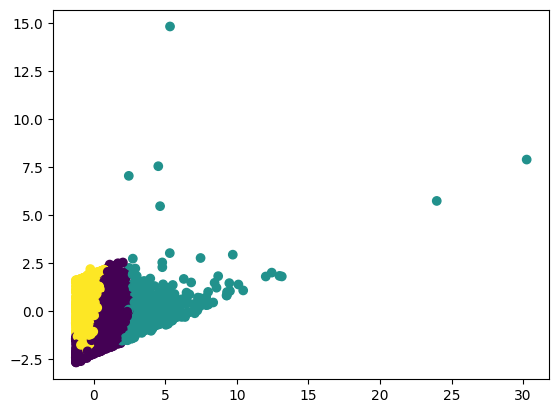

In [322]:
k=3

print('\n when k is :',k)
pi,mu,var=EM(df, k, max_iter=500)
print('mu values are:',mu)
print('var is :',var)
print('pi is ',pi)

prediction_k3=predict_clusters(df,pi,mu,var)
sc=silhouette_score(df,prediction_k3)
print('silhietter score is:',sc)
score.append(sc)
plt.scatter(df[0],df[1],c=prediction_k3)


 when k is : 4
mean values are: [[-0.14772693 -0.35787942]
 [ 3.49394012 -0.31810527]
 [-0.50678873  0.80490902]
 [ 0.88854214 -0.50966808]]
variance is : [[[0.24207245 0.20108116]
  [0.20108116 0.82426852]]

 [[7.69621712 2.15567182]
  [2.15567182 0.9018165 ]]

 [[0.09315219 0.02709341]
  [0.02709341 0.44526368]]

 [[0.80516695 0.32982443]
  [0.32982443 0.69294926]]]
pi is  [0.4757017  0.02447649 0.32921094 0.17061086]
silhietter score is: 0.30479320008923055


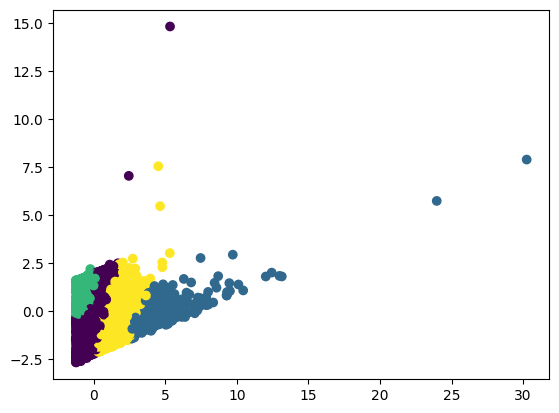

In [323]:
k=4

print('\n when k is :',k)
pi,mu,var=EM(df, k, max_iter=500)
print('mean values are:',mu)
print('variance is :',var)
print('pi is ',pi)

prediction_k4=predict_clusters(df,pi,mu,var)
sc=silhouette_score(df,prediction_k4)
print('silhietter score is:',sc)
score.append(sc)
plt.scatter(df[0],df[1],c=prediction_k4)

plt.show()

In [324]:
for i in range(len(k_values)):
  print('when k is ',k_values[i],'score is :',score[i])


when k is  2 score is : 0.45548719509551755
when k is  3 score is : 0.2928801813732605
when k is  4 score is : 0.30479320008923055
